In [ ]:
# Data loading
import pandas as pd
import numpy as np
data = pd.read_csv('iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Data extraction
x = data.iloc[:, [0, 1, 2, 3]].values

In [ ]:
# Finding the number of clusters (k) - Elbow Method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

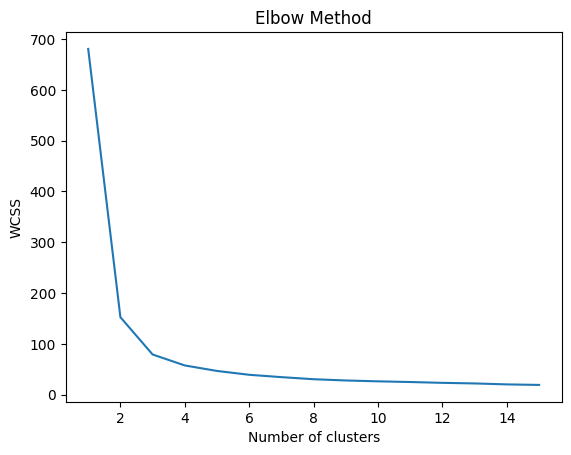

In [ ]:
# Plotting the Elbow Method
plt.plot(range(1, 16), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
# Building the model
kmeans1 = KMeans(n_clusters=3, random_state=1)
y_pred1 = kmeans1.fit_predict(x)

kmeans2 = KMeans(n_clusters=4, random_state=1)
y_pred2 = kmeans2.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Silhouette scores
from sklearn.metrics import silhouette_score

sil_score1 = silhouette_score(x, kmeans1.labels_)
sil_score2 = silhouette_score(x, kmeans2.labels_)

print("Silhouette Score for 3 clusters: ", sil_score1)
print("Silhouette Score for 4 clusters: ", sil_score2)

Silhouette Score for 3 clusters:  0.5525919445499757
Silhouette Score for 4 clusters:  0.4972279726640147


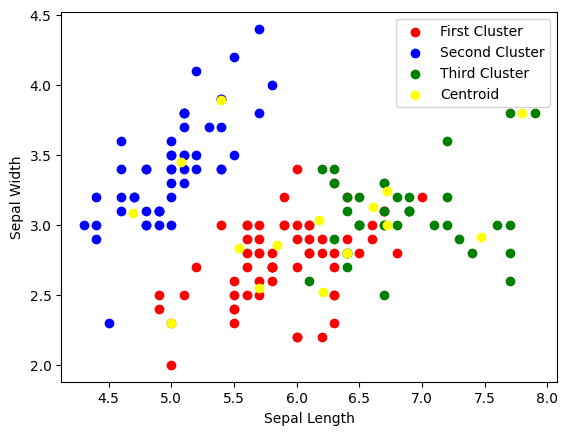

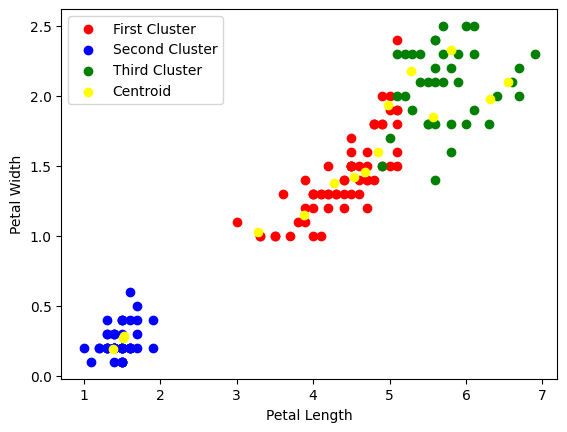

In [ ]:
# Visualizing the clusters with centroids
plt.scatter(x[y_pred1 == 0, 0], x[y_pred1 == 0, 1], c='red', label='First Cluster')
plt.scatter(x[y_pred1 == 1, 0], x[y_pred1 == 1, 1], c='blue', label='Second Cluster')
plt.scatter(x[y_pred1 == 2, 0], x[y_pred1 == 2, 1], c='green', label='Third Cluster')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='yellow', label='Centroid')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

plt.scatter(x[y_pred1 == 0, 2], x[y_pred1 == 0, 3], c='red', label='First Cluster')
plt.scatter(x[y_pred1 == 1, 2], x[y_pred1 == 1, 3], c='blue', label='Second Cluster')
plt.scatter(x[y_pred1 == 2, 2], x[y_pred1 == 2, 3], c='green', label='Third Cluster')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], c='yellow', label='Centroid')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()


In [ ]:
# Print cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)

Cluster Centers:
 [[4.69       3.085      1.385      0.19      ]
 [5.84444444 2.85555556 4.97777778 1.93333333]
 [7.475      2.9125     6.3125     1.975     ]
 [5.7        2.55       3.875      1.15      ]
 [6.6125     3.125      5.275      2.175     ]
 [5.4        3.89230769 1.50769231 0.26923077]
 [5.         2.3        3.275      1.025     ]
 [6.4        2.8        5.5625     1.85      ]
 [6.72222222 3.         4.67777778 1.45555556]
 [6.72       3.24       5.8        2.33      ]
 [5.54166667 2.83333333 4.275      1.375     ]
 [7.8        3.8        6.55       2.1       ]
 [6.17777778 3.03333333 4.53333333 1.42222222]
 [5.07647059 3.44705882 1.52352941 0.28823529]
 [6.21111111 2.52222222 4.85555556 1.6       ]]
